# IBM Project Number 1: 
- Sections required in your report:
1. A summary of the data, clearly showing the size of the dataset, its variables, and possible target variables.
2. A well-structured data exploration plan that is logical, meaningful, and outlines the vision for analysis.
3. A detailed discussion of Exploratory Data Analysis (EDA) results that are informative, actionable, and insightful.
4. A clear explanation of data cleaning and feature engineering steps, including handling missing values, encoding, and visualizations.
5. The report should also include the output of data cleaning, feature engineering steps, handling missing values, encoding, and visualizations. Relevant screenshots should be included. 
6. A dedicated section summarizing key findings and insights, effectively synthesizing EDA results in a meaningful and actionable way.
7. A section that presents at least three hypotheses relevant to the dataset. 
8. A thorough discussion of a significance test for at least one strong hypothesis. The results or their presentation should be truly insightful and exceed expectations, even if there are slight misinterpretations or room for feedback.
9. A concluding section that includes key takeaways and next steps.

## Summary of the dataset

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import zscore
from scipy.stats import ttest_ind

In [2]:
df = pd.read_csv("funding_risk_data_sample.csv")
df.head(5)

,institution_id,funding_source,funding_amount,maturity_date,refinancing_needed,interest_spread,funding_currency,days_to_maturity,credit_rating
0,INST0,equity,1.339455e+08,2025-01-01,False,30.54,JPY,148,A
1,INST1,interbank,2.864152e+08,2025-01-02,False,13.57,GBP,438,A
2,INST2,equity,9.993584e+08,2025-01-03,False,-4.54,USD,637,B
3,INST3,bond,2.744035e+08,2025-01-04,True,57.77,EUR,667,B
4,INST4,equity,8.187816e+08,2025-01-05,False,34.79,GBP,85,D


In [3]:
# Find the number of rows
number_rows = df.shape[0]
print(f"The dataset has {number_rows} rows.")


The dataset has 100000 rows.


In [4]:
print(f"The dataset has {df.shape[1]} colums.")

The dataset has 9 colums.


In [5]:
# Check the types of variables, there is not any variable with missing columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   institution_id      100000 non-null  object 
 1   funding_source      100000 non-null  object 
 2   funding_amount      100000 non-null  float64
 3   maturity_date       100000 non-null  object 
 4   refinancing_needed  100000 non-null  bool   
 5   interest_spread     100000 non-null  float64
 6   funding_currency    100000 non-null  object 
 7   days_to_maturity    100000 non-null  int64  
 8   credit_rating       100000 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(5)
memory usage: 6.2+ MB


| Column               | Type    | Description                                      |
| -------------------- | ------- | ------------------------------------------------ |
| `institution_id`     | object  | Identifier – not useful as a feature or target   |
| `funding_source`     | object  | Categorical – type of funding (repo, bond, etc.) |
| `funding_amount`     | float64 | Continuous – total capital obtained              |
| `maturity_date`      | object  | Date – could be used to derive time features     |
| `refinancing_needed` | bool    | ✅ Potential target – indicates funding stress    |
| `interest_spread`    | float64 | Continuous – risk premium above benchmark rate   |
| `funding_currency`   | object  | Categorical – e.g., USD, EUR                     |
| `days_to_maturity`   | int64   | Integer – time until funding expires             |
| `credit_rating`      | object  | ✅ Potential target – credit risk classification  |


# Potential Target Variables
1. Refinancing needed in order to check the funding stress, 
 - Has practical business value for funding risk prediction
 - Binary Classification
 - Predict whether a funding source will require refinancing.
 - Funding risk forecasting or early warning systems.
2. Credit Rating: Predict the credit rating
 - Multiclass classification
 - Credit risk modeling or bond rating prediction.
3. interest_spread – Regression
 - Predict the interest spread given funding characteristics.
 - Pricing or risk-based interest modeling. 


In [6]:
# Check the statistics
print(df.describe())

       funding_amount  interest_spread  days_to_maturity
count    1.000000e+05    100000.000000     100000.000000
mean     5.011790e+08        50.022623        365.505820
std      2.884306e+08        15.032533        210.745538
min      1.008162e+06       -17.360000          1.000000
25%      2.522875e+08        39.890000        183.000000
50%      5.008132e+08        50.050000        365.000000
75%      7.508501e+08        60.152500        549.000000
max      9.999863e+08       116.460000        729.000000


# funding_amount
- Range: $1M to $999M
- Mean: ~$501M
- Std Dev: $288M (very large → high variability)
- Median (50%): $500M
- 25% / 75% quartiles: $252M to $750M

#### Insights:
- Fairly symmetric distribution centered around $500M.
- No extreme outliers but wide range of funding amounts.
- Could use log scale in visualizations to better analyze.

# interest_spread
- Range: -17.36 bps to 116.46 bps
- Mean: ~50 bps
- Std Dev: 15 bps
- 25–75% range: ~40–60 bps

#### Insights:
- Mostly centered around 50 bps, consistent with a normal distribution.
- Negative spread values exist → may indicate subsidized or special cases (double-check if realistic).
- You could detect outliers beyond ±3 standard deviations.

# days_to_maturity
- Range: 1 to 729 days
- Mean: ~365 days
- 25–75% range: 183 to 549 days

#### Insights:
- Looks like a uniform or flat distribution centered around 1 year.
- May simulate randomized maturity periods for synthetic data.
- If building a model, this could influence refinancing risk or time-dependent features.

In [7]:
# Frequency counts for categorical columns
for col in df.select_dtypes(include='object').columns:
    print(f"\n How many times each value in each column appears for -> {col}:\n{df[col].value_counts()}")


 How many times each value in each column appears for -> institution_id:
institution_id
INST0       10
INST1       10
INST2       10
INST3       10
INST4       10
            ..
INST9995    10
INST9996    10
INST9997    10
INST9998    10
INST9999    10
Name: count, Length: 10000, dtype: int64

 How many times each value in each column appears for -> funding_source:
funding_source
interbank    25138
repo         25116
bond         25092
equity       24654
Name: count, dtype: int64

 How many times each value in each column appears for -> maturity_date:
maturity_date
2025-01-01    137
2025-01-02    137
2025-01-03    137
2025-01-04    137
2025-01-05    137
             ... 
2026-12-27    136
2026-12-28    136
2026-12-29    136
2026-12-30    136
2026-12-31    136
Name: count, Length: 730, dtype: int64

 How many times each value in each column appears for -> funding_currency:
funding_currency
GBP    25028
EUR    25028
USD    25000
JPY    24944
Name: count, dtype: int64

 How many times ea

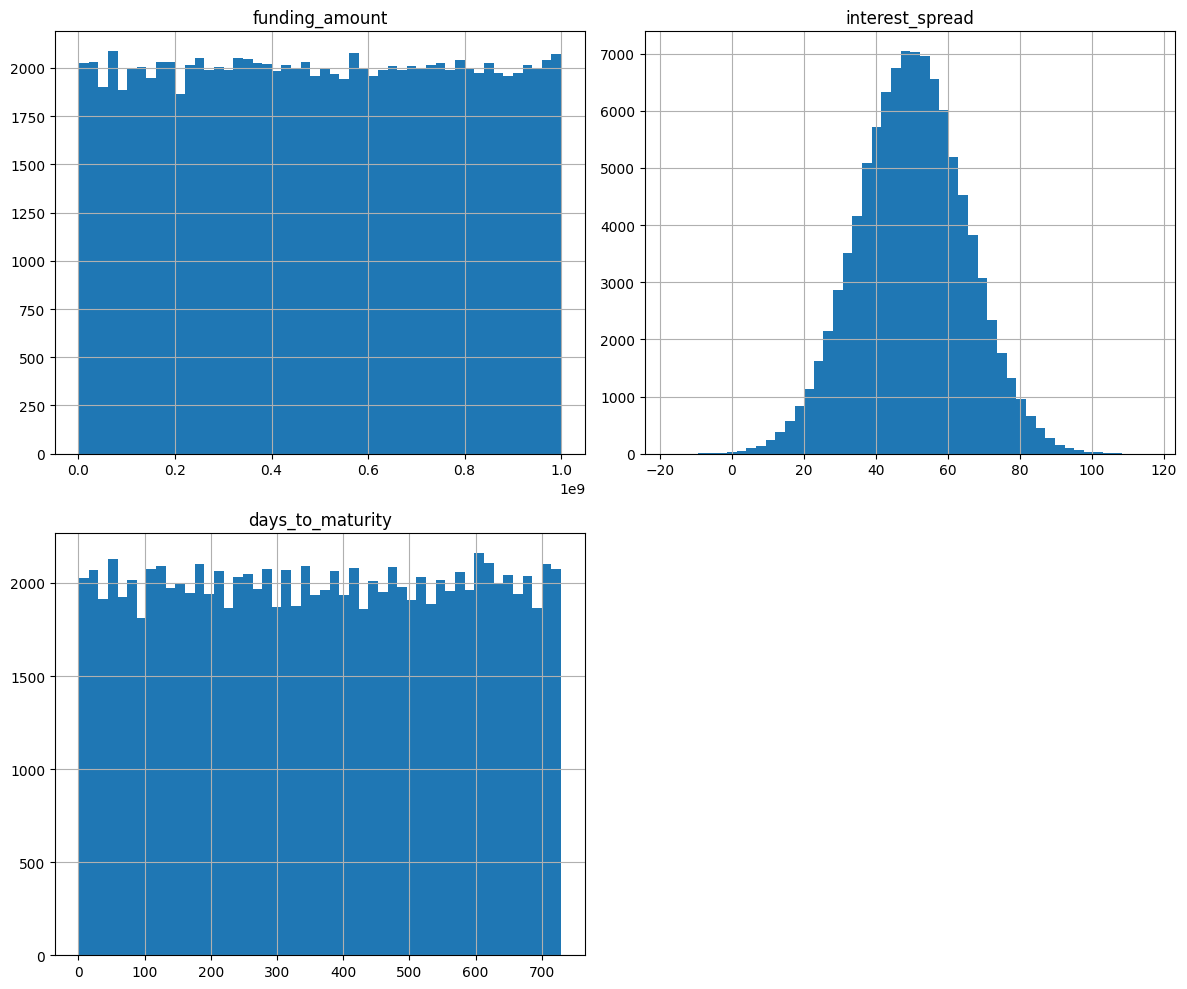

In [8]:
# Histogram 
df.hist(bins=50, figsize=(12, 10))
plt.tight_layout()
plt.show()

## Distribution of funding amount

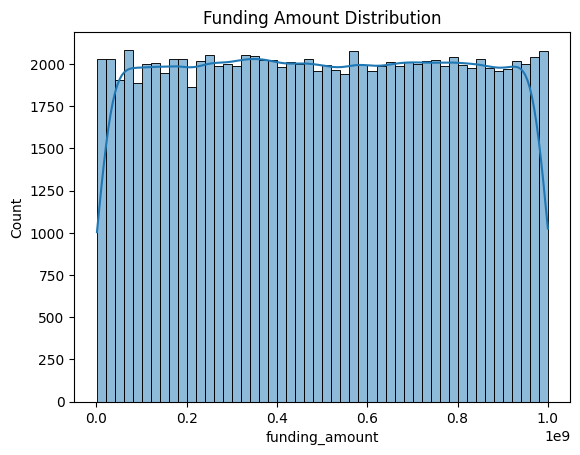

In [9]:
# Distribution of funding amount
sns.histplot(df['funding_amount'], bins=50, kde=True)
plt.title("Funding Amount Distribution")
plt.show()

### Distribution of interest_spread


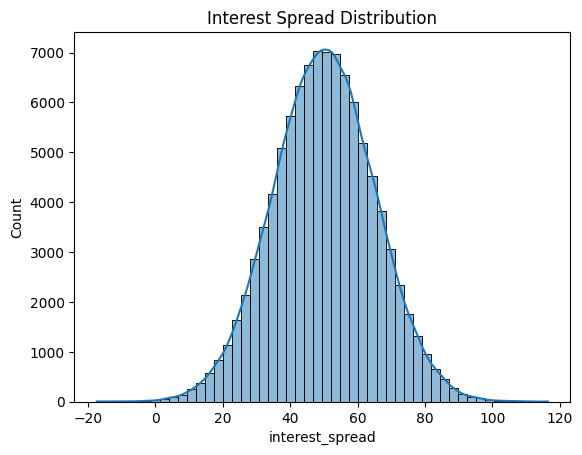

In [10]:
# Distribution of interest_spread
sns.histplot(df['interest_spread'], bins=50, kde=True)
plt.title("Interest Spread Distribution")
plt.show()

### Distribution of days_to_maturity


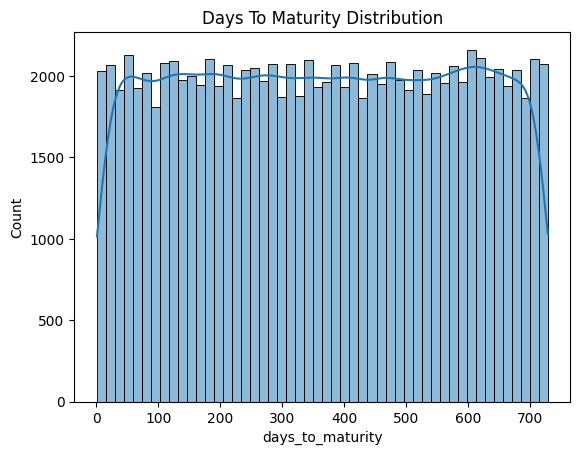

In [11]:
# Distribution of days_to_maturity
sns.histplot(df['days_to_maturity'], bins=50, kde=True)
plt.title("Days To Maturity Distribution")
plt.show()

# Categorical Features

### Distribution of funding source


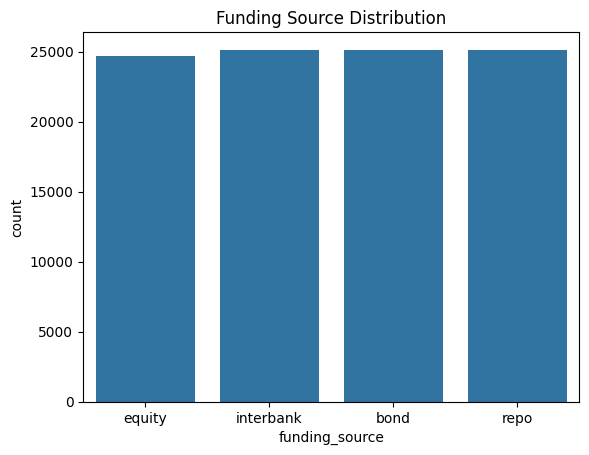

In [12]:
# Distribution of funding source
sns.countplot(data=df, x='funding_source')
plt.title("Funding Source Distribution")
plt.show()

### Distribution of refinancing_needed
- The dataset will be unbalanced for categorical algorithms
- There are way more False than true

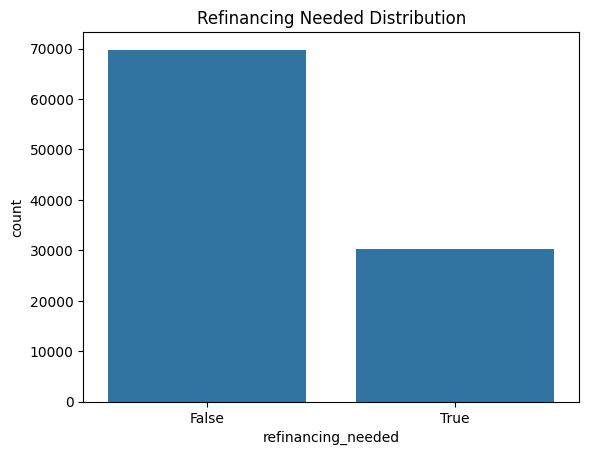

In [13]:
# Distribution of refinancing_needed
sns.countplot(data=df, x='refinancing_needed')
plt.title("Refinancing Needed Distribution")
plt.show()

### Distribution of funding_currency

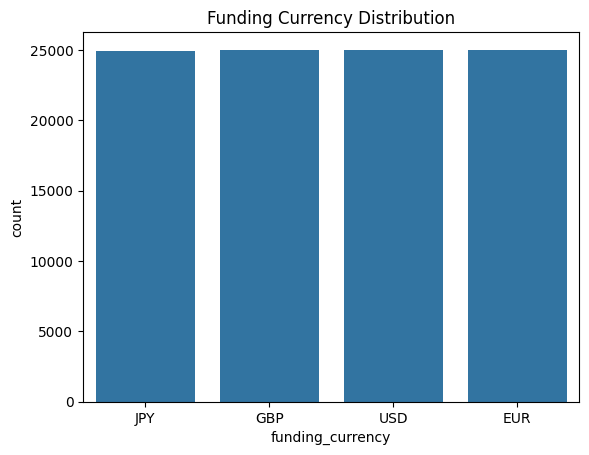

In [14]:
# Distribution of Funding Currency
sns.countplot(data=df, x='funding_currency')
plt.title("Funding Currency Distribution")
plt.show()

# Distribution of credit_rating

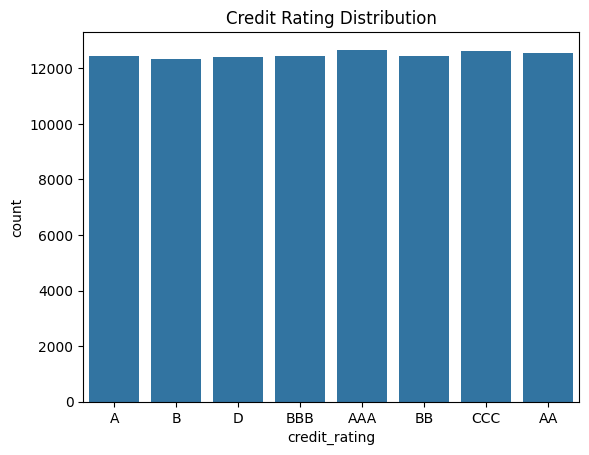

In [15]:
# Distribution of Credit Rating
sns.countplot(data=df, x='credit_rating')
plt.title("Credit Rating Distribution")
plt.show()

### Bivariate Analysis - Refinancing Needs (Case that I have chosen to solve)
- Bivariate analysis examines the relationship between two variables to understand how they are associated. It uses techniques like correlation, cross-tabulation, and scatter plots.

#### Correlation Matrix
- Understand how numeric features relate to each other and to the target if encoded numerically.

In [16]:
# Encode target as int (True → 1, False → 0)
df['refinancing_needed'] = df['refinancing_needed'].astype(int)

# Correlation Matrix
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix['refinancing_needed'].sort_values(ascending=False))

refinancing_needed    1.000000
interest_spread       0.002469
days_to_maturity     -0.000950
funding_amount       -0.002805
Name: refinancing_needed, dtype: float64


- interest_spread (0.0025)
- days_to_maturity (−0.00095)
- funding_amount (−0.0028) 
- Result = have very weak to no linear correlation with refinancing_needed.

##### Check how features like funding_amount, interest_spread, or days_to_maturity behave when refinancing is needeed or not

# Correlation Heatmap

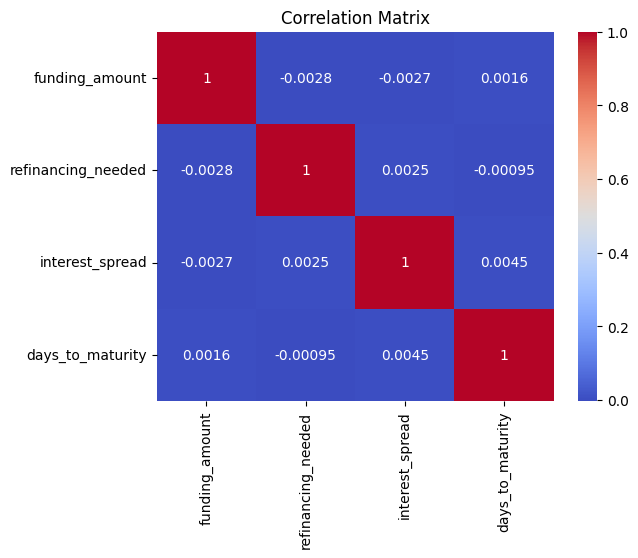

In [17]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [18]:
group_stats = df.groupby('refinancing_needed').mean(numeric_only=True)
print(group_stats)

                    funding_amount  interest_spread  days_to_maturity
refinancing_needed                                                   
0                     5.017111e+08        49.998213        365.637471
1                     4.999491e+08        50.079051        365.201484


# Insights:
- Both loans/bonds are around 500 million, indicating large-scale funding.
- Their interest spreads are close to 50%, suggesting either high-risk borrowers or misrecorded values (normally, spreads are much lower for standard loans).
- Both have ~1 year to maturity, implying short-term instruments.

### Add box plots to spot higher or lower spreads linked to more refinancing or less refinancing

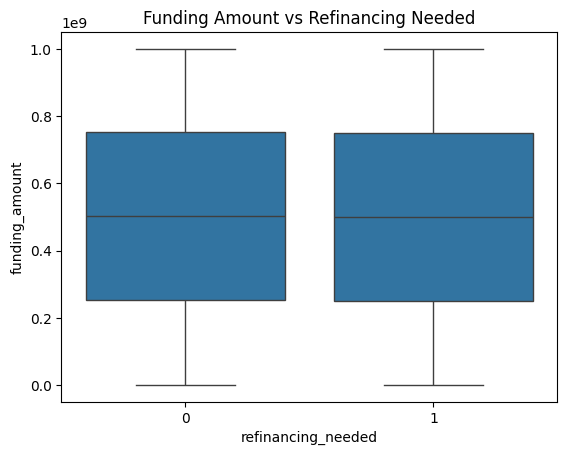

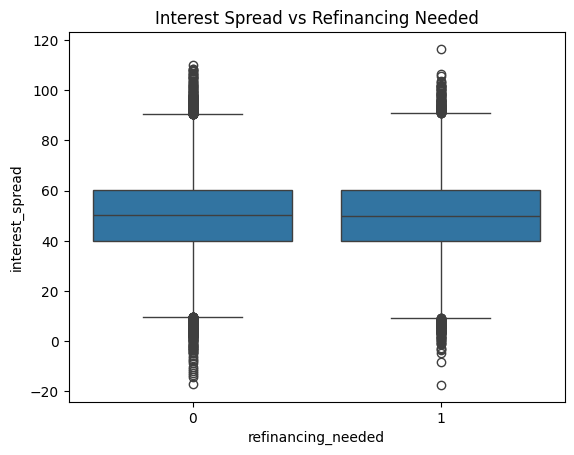

In [19]:
# Boxplot: funding_amount vs refinancing_needed
sns.boxplot(data=df, x='refinancing_needed', y='funding_amount')
plt.title("Funding Amount vs Refinancing Needed")
plt.show()

# Boxplot: interest_spread vs refinancing_needed
sns.boxplot(data=df, x='refinancing_needed', y='interest_spread')
plt.title("Interest Spread vs Refinancing Needed")
plt.show()

### Make chi square test to check 
- if a categorical feature is dependent on the target

In [20]:
table = pd.crosstab(df['funding_source'], df['refinancing_needed'])
chi2, p, dof, ex = chi2_contingency(table)
print(f"Chi-squared test p-value: {p}")

Chi-squared test p-value: 0.7764803149502747


- There is no statistically significant association between the two categorical variables tested.
- Since the p-value is much higher than typical significance thresholds (like 0.05), we fail to reject the null hypothesis.
- The variables are likely independent, one does not influence the other in a meaningful way based on the data.

In [21]:
table = pd.crosstab(df['funding_currency'], df['refinancing_needed'])
chi2, p, dof, ex = chi2_contingency(table)
print(f"Chi-squared test p-value: {p}")

Chi-squared test p-value: 0.6179351930629506


- There is no statistically significant association between the two categorical variables tested.
- Since the p-value is much higher than typical significance thresholds (like 0.05), we fail to reject the null hypothesis.
- The variables are likely independent, one does not influence the other in a meaningful way based on your data.

In [22]:
table = pd.crosstab(df['credit_rating'], df['refinancing_needed'])
chi2, p, dof, ex = chi2_contingency(table)
print(f"Chi-squared test p-value: {p}")

Chi-squared test p-value: 0.8803764370850701


- There is no statistically significant association between the two categorical variables tested.
- Since the p-value is much higher than typical significance thresholds (like 0.05), we fail to reject the null hypothesis.
- The variables are likely independent, one does not influence the other in a meaningful way based on your data.

# Outlier Detection

### IQR Method (Interquartile Range)
- The IQR method identifies outliers that lie outside 1.5× the interquartile range.

In [23]:
# Find the 25th quantile
Q1 = df["interest_spread"].quantile(0.25)
# Find the 75th quantile
Q3 = df["interest_spread"].quantile(0.75)

# Metric
IQR = Q3 - Q1

# Calculate the lower bound
lower_bound = Q1 - 1.5 * IQR

# Calculate the higher bound
upper_bound = Q3 + 1.5 * IQR

# Outlier Detector
iqr_outliers_test = df[(df['interest_spread'] < lower_bound) | (df['interest_spread'] > upper_bound)]
print(f"By the IQR test I have that much outliers in interest_spread: {len(iqr_outliers_test)}")

By the IQR test I have that much outliers in interest_spread: 682


#### Outlier detection for funding_amount 

In [24]:
# Find the 25th quantile
Q1 = df["funding_amount"].quantile(0.25)
# Find the 75th quantile
Q3 = df["funding_amount"].quantile(0.75)

# Metric
IQR = Q3 - Q1

# Calculate the lower bound
lower_bound = Q1 - 1.5 * IQR

# Calculate the higher bound
upper_bound = Q3 + 1.5 * IQR

# Outlier Detector
iqr_outliers_test = df[(df['funding_amount'] < lower_bound) | (df['funding_amount'] > upper_bound)]
print(f"By the IQR test I have that much outliers in funding_amount: {len(iqr_outliers_test)}")

By the IQR test I have that much outliers in funding_amount: 0


# Z-Score Method
- Find the outlier with methods such as 
- The Z-score method flags data points that are a certain number of standard deviations away from the mean (commonly > 3 or < -3).

In [25]:
# Find the Z Score
df['z_score_spread'] = zscore(df['interest_spread'])

# Outliers where z-score > 3 or < -3
z_outliers = df[(df['z_score_spread'] > 3) | (df['z_score_spread'] < -3 )]

print(f"By the Z-score we have outliers in interest_spread: {len(z_outliers)}")


By the Z-score we have outliers in interest_spread: 280


In [26]:
# Find the Z Score
df['z_score_spread'] = zscore(df['funding_amount'])

# Outliers where z-score > 3 or < -3
z_outliers = df[(df['z_score_spread'] > 3) | (df['z_score_spread'] < -3 )]

print(f"By the Z-score we have outliers in funding_amount: {len(z_outliers)}")

By the Z-score we have outliers in funding_amount: 0


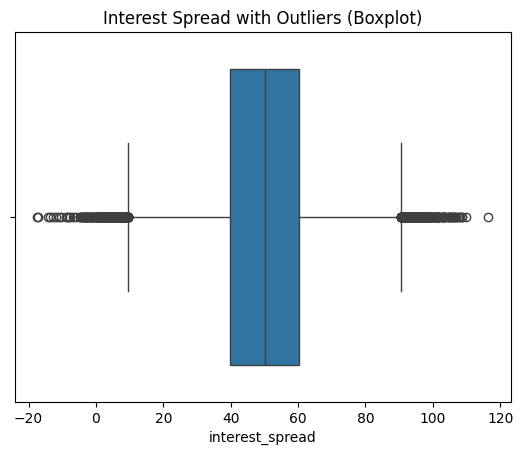

In [27]:
sns.boxplot(x=df['interest_spread'])
plt.title("Interest Spread with Outliers (Boxplot)")
plt.show()

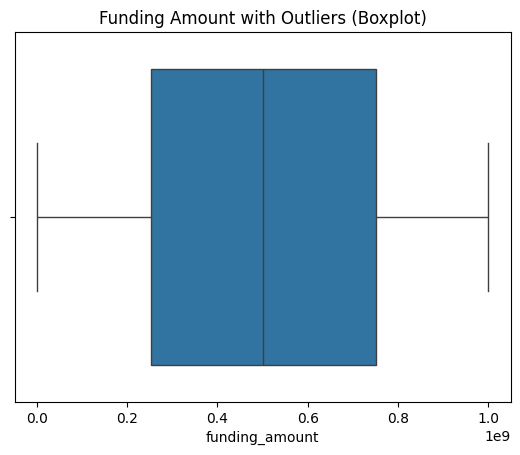

In [28]:
sns.boxplot(x=df['funding_amount'])
plt.title("Funding Amount with Outliers (Boxplot)")
plt.show()

# Feature Engineering

| **Feature Name**      | **Type**    | **Value Range / Categories**                  | **Description / Purpose**                                                      |
| --------------------- | ----------- | --------------------------------------------- | ------------------------------------------------------------------------------ |
| `maturity_bucket`     | Categorical | `short_term`, `medium_term`, `long_term`      | Categorizes funding by how far it is from maturity.                            |
| `spread_level`        | Categorical | `low`, `medium`, `high`                       | Risk premium category to simplify analysis.                                    |
| `funding_size_class`  | Categorical | `small`, `medium`, `large`                    | Categorizes funding amount into intuitive buckets.                             |
| `rating_score`        | Ordinal     | 1 (AAA) to 8 (D)                              | Converts `credit_rating` to a numerical scale for ML models.                   |
| `is_foreign_currency` | Boolean     | 0 (USD) / 1 (non-USD)                         | Indicates whether the funding currency is foreign.                             |
| `adjusted_spread`     | Numerical   | Depends on division                           | Interest spread normalized by days to maturity – reflects yield per time unit. |
| `risk_bucket`         | Categorical | `low_risk`, `moderate_risk`, `very_high_risk` | Combined risk level from spread and credit rating.                             |


- maturity_bucker : Categorize time to maturity (short term, medium term, long term)

In [29]:
def categorize_maturity(days):
    if days <= 180:
        return 'short_term'
    elif days <= 365:
        return 'medium_term'
    else:
        return 'long_term'

df['maturity_bucket'] = df['days_to_maturity'].apply(categorize_maturity)


- spread level : Categorize interest spread

In [30]:
def categorize_spread(spread):
    if spread < 40:
        return 'low'
    elif spread < 70:
        return 'medium'
    else:
        return 'high'

df['spread_level'] = df['interest_spread'].apply(categorize_spread)

- funding_size – Categorize funding amount

In [31]:
def size_class(amount):
    if amount < 250_000_000:
        return 'small'
    elif amount < 750_000_000:
        return 'medium'
    else:
        return 'large'

df['funding_size_class'] = df['funding_amount'].apply(size_class)


- rating_score – Ordinal mapping of credit ratings

In [32]:
rating_map = {'AAA': 1, 'AA': 2, 'A': 3, 'BBB': 4, 'BB': 5, 'B': 6, 'CCC': 7, 'D': 8}
df['rating_score'] = df['credit_rating'].map(rating_map)

is_foreign_currency – Flag non-USD funding

In [33]:
df['is_foreign_currency'] = (df['funding_currency'] != 'USD').astype(int)

- adjusted_spread – Spread per maturity day

In [34]:
df['adjusted_spread'] = df['interest_spread'] / df['days_to_maturity']

- risk_bucket – Combine spread and rating into a synthetic risk category

In [35]:
def risk_bucket(row):
    if row['spread_level'] == 'high' and row['rating_score'] >= 6:
        return 'very_high_risk'
    elif row['spread_level'] == 'medium' and row['rating_score'] >= 4:
        return 'moderate_risk'
    else:
        return 'low_risk'

df['risk_bucket'] = df.apply(risk_bucket, axis=1)


# Why creating each feature

| **Goal**                           | **Useful Features**                                                      |
| ---------------------------------- | ------------------------------------------------------------------------ |
| Classify refinancing risk          | `spread_level`, `credit_rating`, `maturity_bucket`, `funding_size_class` |
| Segment institutional profiles     | `funding_source`, `funding_size_class`, `rating_score`                   |
| Model sensitivity to interest risk | `interest_spread`, `adjusted_spread`, `risk_bucket`                      |
| Analyze risk by maturity           | `maturity_bucket`, `days_to_maturity`                                    |


# Hypothesis Testing

## Hypothesis 1:
- Institutions with higher interest spreads are more likely to require refinancing.
- Why this matters: High spreads may indicate higher perceived credit risk or market instability.
- Stakeholder benefit: Helps risk officers flag high-cost funding deals as potential refinancing risks.

In [36]:
# Explore the variables associated
df[['interest_spread', 'refinancing_needed']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   interest_spread     100000 non-null  float64
 1   refinancing_needed  100000 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 1.5 MB


In [37]:
df['refinancing_needed'].value_counts()

refinancing_needed
0    69804
1    30196
Name: count, dtype: int64

In [38]:
# Check if institutions with refinancing have higher interest spread.
df.groupby('refinancing_needed')['interest_spread'].mean()

refinancing_needed
0    49.998213
1    50.079051
Name: interest_spread, dtype: float64

- There is a very small difference in the spread.

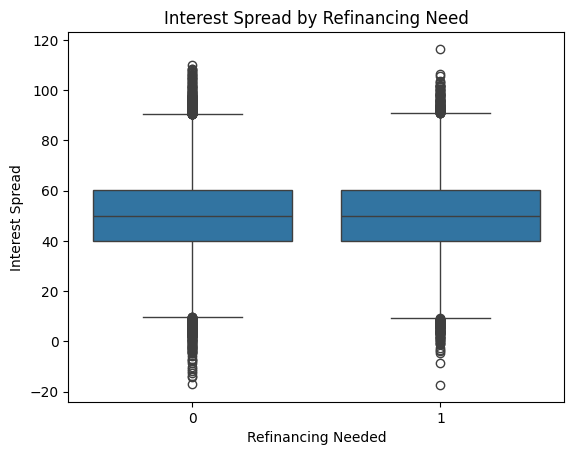

In [39]:
sns.boxplot(x='refinancing_needed', y='interest_spread', data=df)
plt.title("Interest Spread by Refinancing Need")
plt.xlabel("Refinancing Needed")
plt.ylabel("Interest Spread")
plt.show()

- Perform a test with t-test
- Check if the difference in mean is statistically significant

In [41]:
group_0 = df[df['refinancing_needed'] == 0]['interest_spread']
group_1 = df[df['refinancing_needed'] == 1]['interest_spread']

In [42]:
t_stat, p_val = ttest_ind(group_0, group_1, equal_var=False)
print(f"T-statistic: {t_stat:.4f}, p-value: {p_val:.4f}")

T-statistic: -0.7803, p-value: 0.4352


- The p-value is 0.4352, which is much greater than 0.05.
- This means the difference in mean interest spreads between institutions that do and do not require refinancing is not statistically significant.
- The negative t statitic also shows that the instituitions that do not need refinancing actually had a slower average interest spread not statisticaly significant

# Hypothesis 2
- Shorter time to maturity increases the likelihood of refinancing needs.
- Why this matters: Instruments nearing maturity often trigger refinancing decisions.
- Stakeholder benefit: Assists treasury and funding departments in timing and planning rollover strategies.

In [43]:
# make a check in the variables
df[['days_to_maturity', 'refinancing_needed']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   days_to_maturity    100000 non-null  int64
 1   refinancing_needed  100000 non-null  int64
dtypes: int64(2)
memory usage: 1.5 MB


In [44]:
df['refinancing_needed'].value_counts()

refinancing_needed
0    69804
1    30196
Name: count, dtype: int64

In [45]:
# Check the average time each type of refinancing value has on average for maturity
df.groupby('refinancing_needed')['days_to_maturity'].mean()

refinancing_needed
0    365.637471
1    365.201484
Name: days_to_maturity, dtype: float64

- Again the difference is not that much

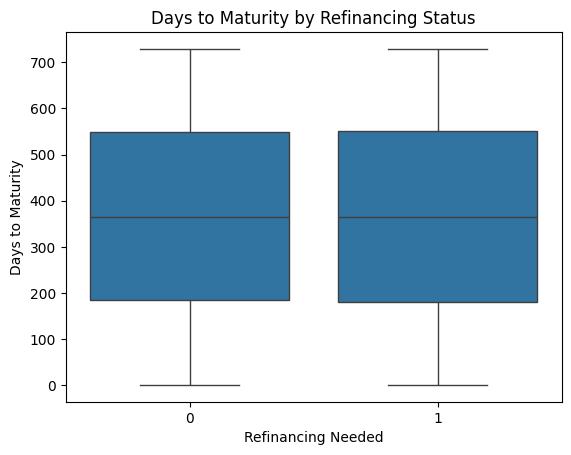

In [46]:
sns.boxplot(x='refinancing_needed', y='days_to_maturity', data=df)
plt.title("Days to Maturity by Refinancing Status")
plt.xlabel("Refinancing Needed")
plt.ylabel("Days to Maturity")
plt.show()


In [49]:
# Check if the difference in average days to maturity is statistically significant
no_need_refinance = df[df['refinancing_needed'] == 0]['days_to_maturity']
need_refinance = df[df['refinancing_needed'] == 1]['days_to_maturity']
t_stat, p_val = ttest_ind(no_need_refinance, need_refinance, equal_var=False)

In [50]:
print(f"T-statistic: {t_stat:.4f}, p-value: {p_val:.4f}")

T-statistic: 0.2996, p-value: 0.7645


- The p-value is 0.7645, which is much greater than 0.05, meaning the difference in average days_to_maturity between the two groups is not statistically significant.
- In fact, the slightly positive t-statistic suggests that refinancing cases might even have slightly longer maturity days, though this is also not significant.

- This means that in my current dataset:
1. Refinancing decisions are not significantly tied to how soon the instrument matures.
2. This could imply refinancing is driven by other factors like funding cost, institution type, or liquidity—not just time left.

# Hypothesis 3:
- Funding amount size is inversely related to refinancing probability.
- Why this matters: Larger funding amounts might reflect more secure, well-planned financing; smaller amounts may indicate ad-hoc or bridge funding.
- Stakeholder benefit: Helps identify smaller, potentially riskier deals that may require more oversight.

In [52]:
# Check the variables associates
df[['funding_amount', 'refinancing_needed']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   funding_amount      100000 non-null  float64
 1   refinancing_needed  100000 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 1.5 MB


In [53]:
# Check if the funds who need refinancing have lower average funding 
df.groupby('refinancing_needed')['funding_amount'].mean()

refinancing_needed
0    5.017111e+08
1    4.999491e+08
Name: funding_amount, dtype: float64

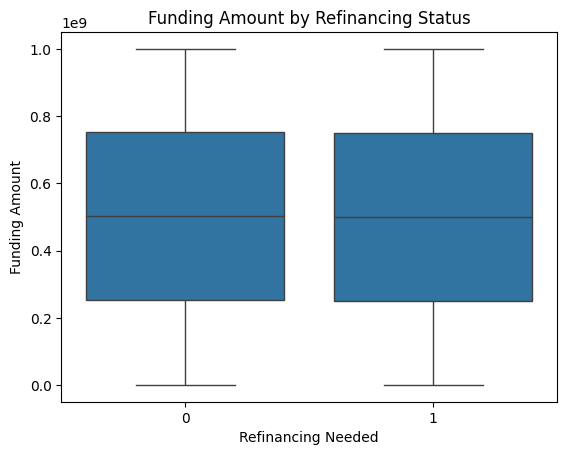

In [54]:
sns.boxplot(x='refinancing_needed', y='funding_amount', data=df)
plt.title("Funding Amount by Refinancing Status")
plt.xlabel("Refinancing Needed")
plt.ylabel("Funding Amount")
plt.show()

In [55]:
# Statistically test the difference in mean funding amount
group_0 = df[df['refinancing_needed'] == 0]['funding_amount']
group_1 = df[df['refinancing_needed'] == 1]['funding_amount']

t_stat, p_val = ttest_ind(group_0, group_1, equal_var=False)
print(f"T-statistic: {t_stat:.4f}, p-value: {p_val:.4f}")

T-statistic: 0.8864, p-value: 0.3754


- The p-value (0.3754) is greater than 0.05, so the difference in average funding amounts between refinancing and non-refinancing groups is not statistically significant.
- The positive t-statistic actually suggests that institutions needing refinancing may even have slightly higher funding amounts, though again, not significant.

# Hypothesis Testing Results

| Hypothesis                                     | Supported? | Notes                        |
| ---------------------------------------------- | ---------- | ---------------------------- |
| 1. Higher interest spread → More refinancing   | ❌ No       | p = 0.4352 – not significant |
| 2. Shorter time to maturity → More refinancing | ❌ No       | p = 0.7645 – not significant |
| 3. Smaller funding amount → More refinancing   | ❌ No       | p = 0.3754 – not significant |

# Export the dataset to a cv

In [56]:
df.to_csv("Feature_Engineered_Funding_Data.csv", index=False)